<a href="https://colab.research.google.com/github/PraveenAnanth5451/Deep_Learning_Projects/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

In [53]:
# import the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras

In [54]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [55]:
type(X_train)

numpy.ndarray

In [56]:
# shape of the numpy array
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Training data = 60,000 images
Test data = 10,000 images

Image dimension = 28 x 28
GrayScale Image = 1 channel

In [57]:
# Printing 10th image
print(X_train[11])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

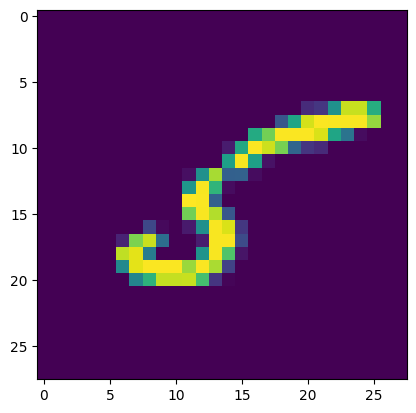

5


In [58]:
plt.imshow(X_train[11])
plt.show()

# Print the corresponding labels
print(y_train[11])

Image labels

In [59]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [60]:
# Unique values in y_train
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one-hot encoding

All the images have the same dimensions in this dataset, If not, we have to resize all the images to common dimensions

In [61]:
# Scalling the values
X_train = X_train/255
X_test = X_test/255

In [62]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a Neural Network

In [63]:
# setting up the layers of the Neural Networks
model = keras.Sequential([
    keras.layers.Input(shape = (28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(50, activation ="relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

# Compiling the neural network
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer = keras.optimizers.Adam(),
              metrics = ["accuracy"])
# Training the neural network
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8541 - loss: 0.5101
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9566 - loss: 0.1494
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9690 - loss: 0.1067
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9749 - loss: 0.0841
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9801 - loss: 0.0677
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0559
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0469
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0394
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0346
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0301


Training data accuracy is 99%

In [64]:
loss, accuracy = model.evaluate(X_test, y_test)
print("accuracy :",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.1167
accuracy : 0.9726999998092651


In [65]:
print(X_test.shape)

(10000, 28, 28)


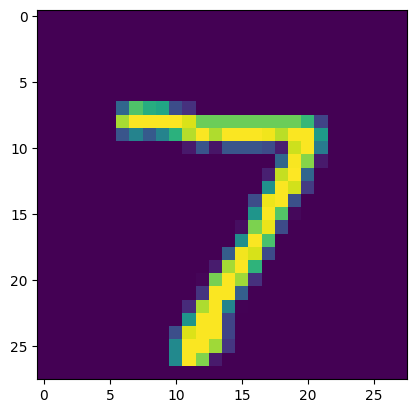

7


In [66]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [67]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [68]:
y_pred.shape

(10000, 10)

In [69]:
y_pred[0]

array([1.5181208e-05, 1.5026133e-07, 4.5670711e-02, 8.7166458e-01,
       2.0528412e-12, 3.4367375e-04, 7.3896522e-10, 9.9999017e-01,
       2.4163131e-02, 4.1766063e-05], dtype=float32)

model.predict() gives the probability of each class for that data point

In [70]:
# Converting the prediction probabilities to class labels
label_for_first_image = np.argmax(y_pred[0])
label_for_first_image

np.int64(7)

In [71]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[np.int64(7),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(4),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(9)]

y_test ---> true labels

y_pred ---> Predicted labels

In [72]:
# Confusion matrix
from tensorflow.math import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    0,    6,    1,    4,    3],
       [   0, 1116,    5,    1,    0,    0,    2,    3,    8,    0],
       [   2,    1, 1004,    7,    1,    1,    2,    8,    4,    2],
       [   0,    0,    6,  993,    0,    3,    1,    2,    4,    1],
       [   1,    0,    5,    0,  932,    1,    7,    1,    9,   26],
       [   1,    0,    0,   23,    0,  843,    7,    1,   13,    4],
       [   3,    2,    3,    1,    1,    4,  942,    0,    2,    0],
       [   2,    2,    7,    8,    0,    0,    1,  997,    6,    5],
       [   3,    0,    3,    4,    1,    3,    2,    3,  954,    1],
       [   0,    3,    0,    7,    2,    2,    1,    3,    9,  982]],
      dtype=int32)>

Text(0.5, 58.7222222222222, 'Predicted Labels')

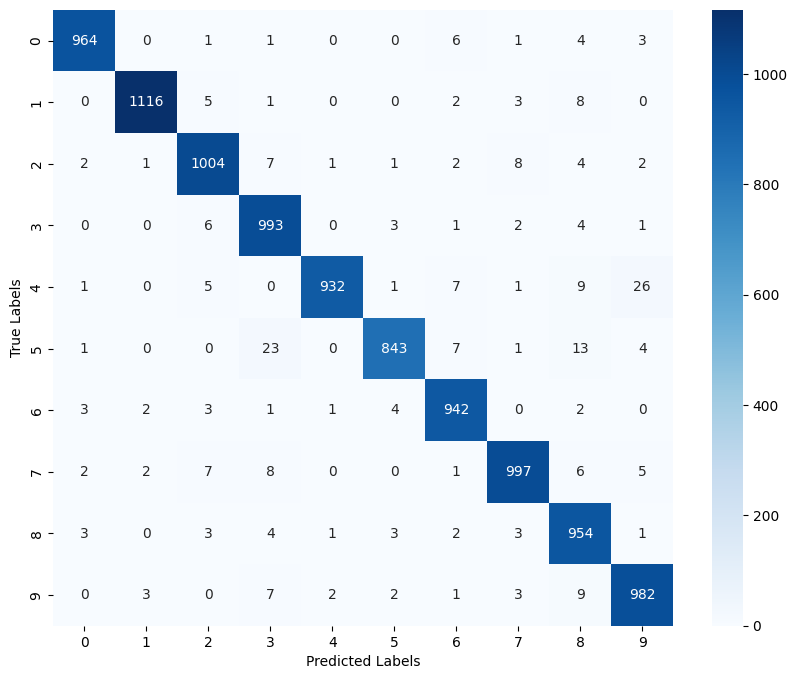

In [73]:
# Visualize the confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

**Building a Predictive system**

In [78]:
path = "/content/drive/MyDrive/DL project/MNIST_digit.png"
input_img = cv2.imread(path)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
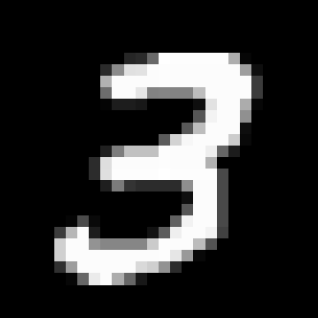

In [79]:
input_img

In [80]:
input_img.shape

(318, 318, 3)

In [81]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

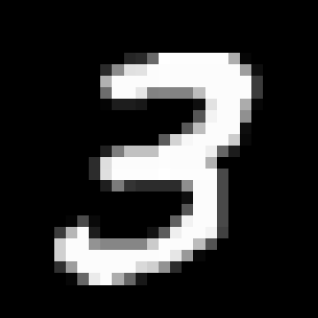

In [82]:
cv2_imshow(grayscale)

In [83]:
grayscale.shape

(318, 318)

In [84]:
img_resized = cv2.resize(grayscale, (28,28))

In [85]:
img_resized.shape

(28, 28)

In [86]:
cv2_imshow(img_resized)

In [87]:
img_resized = img_resized/255

In [88]:
img_resized = np.reshape(img_resized, (1,28,28))

In [89]:
input_pred = model.predict(img_resized)
input_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[3.0074877e-11, 1.4394237e-06, 1.8373810e-04, 1.0000000e+00,
        2.4897946e-17, 9.5865861e-02, 4.0017007e-21, 2.2872689e-05,
        1.6880271e-03, 5.5764848e-01]], dtype=float32)

In [90]:
input_pred_label = np.argmax(input_pred)
input_pred_label

np.int64(3)

**Predicitve system**

In [91]:
def prediction(path):
  input_img_path = path
  input_img = cv2.imread(input_img_path)
  cv2_imshow(input_img)
  grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

  img_resized = cv2.resize(grayscale, (28,28))
  img_resized = img_resized/255

  img_reshape = np.reshape(img_resized, (1,28,28))

  input_pred = model.predict(img_reshape)
  input_pred_label = np.argmax(input_pred)

  print("The Handwritten Digit is : ", input_pred_label )

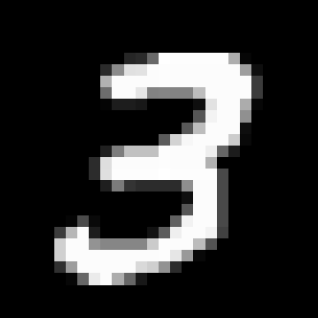

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The Handwritten Digit is :  3


In [92]:
prediction(path)